## Group EDA - Design 2023
**Names: Elaine, Rachel, and Yuthi**

**1. Define Your Audience / Stakeholder – Clearly identify who you are writing your final report for.**

Our final report’s audience/stakeholders include physicians and other researchers evaluating the health of patients who have undergone ACL reconstruction surgery.

**2. Define Your Problem Statement**

**Our Hypotheses:** 
Orthopedic surgeons want to know what the relevant factors to reinjury rates are among patients who have undergone ACLR surgery; factors such as sex, age, and graft_type.

Patients with certain graft types (ie, HS QT, Allograft, etc) will have a higher likeliness of some type of reinjury (contralateral, ipsilateral, both). Some types of visualizations would be a bar chart for the first hypothesis, with graft types on the x-axis and reinjuries on the y-axis. There would be multiple bars for each graft type to show which reinjuries are the most frequent.
We can also use a horizontal stacked bar graph to compare the reinjury statistic in females vs. males:
 - Can also compare the different types of reinjury within the sexes

**3. Identify Important Variables**

List which ones are important for your analysis and why:

We think the most relevant variables would include record_id, sex_dashboard, graft_dashboard2, age, height_m, mass_kg, ikdc, reinjury, and acl_rsi, tegner_pre, tegner_now. We will calculate descriptive statistics for each variable to determine their relevance.

**4. Merge and Clean the Dataset**

In [1]:
# setting up environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importing data as dataframe:
df = pd.read_csv('aclr data(in).csv')

In [2]:
# Including relevant variables into our dataframe and dropping the others:
df = df[['sex_dashboard', 'graft_dashboard2', 'reinjury', 'age', 'height_m', 'mass_kg', 'bmi', 'ikdc', 'acl_rsi']]
df.head()

,sex_dashboard,graft_dashboard2,reinjury,age,height_m,mass_kg,bmi,ikdc,acl_rsi
0,Male,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,No,21.7,1.9,87.4,24.210526,95.4,87.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,HS autograft,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,No,14.5,1.6,72.2,28.203125,79.3,8.3


In [3]:
# Filtering for numeric columns:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
# imputing missing values with the mean for each respective column
mean_values = df[numeric_columns].mean()
m_df = df.fillna(mean_values)
print(m_df.head(5))

  sex_dashboard graft_dashboard2 reinjury        age  height_m    mass_kg  \
0          Male            Other      NaN  20.184761  1.725412  74.343033   
1           NaN              NaN       No  21.700000  1.900000  87.400000   
2           NaN              NaN      NaN  20.184761  1.725412  74.343033   
3        Female     HS autograft      NaN  20.184761  1.725412  74.343033   
4           NaN              NaN       No  14.500000  1.600000  72.200000   

         bmi       ikdc    acl_rsi  
0  25.201579  78.457377  64.929381  
1  24.210526  95.400000  87.500000  
2  25.201579  78.457377  64.929381  
3  25.201579  78.457377  64.929381  
4  28.203125  79.300000   8.300000  


**5. Descriptive Statistics & Distributions**

Provide summaries of important variables:


In [4]:
# Summarizing categorical variables description stats:
print('\nCategorical Variable Descriptions:')
print('\n', df['sex_dashboard'].value_counts())
print('\n', df['graft_dashboard2'].value_counts())
print('\n', df['reinjury'].value_counts())
print('\n', pd.crosstab(df['sex_dashboard'], df['graft_dashboard2']))



Categorical Variable Descriptions:

 Female          2399
Male            2323
Not Reported      15
Name: sex_dashboard, dtype: int64

 BTB autograft    1593
Other            1151
HS autograft     1030
QT autograft      805
Allograft         158
Name: graft_dashboard2, dtype: int64

 BLANK            4273
No                789
Contralateral      61
Ipsilateral        51
Both                1
Name: reinjury, dtype: int64

 graft_dashboard2  Allograft  BTB autograft  HS autograft  Other  QT autograft
sex_dashboard                                                                
Female                   75            834           516    565           409
Male                     83            757           513    574           396
Not Reported              0              2             1     12             0


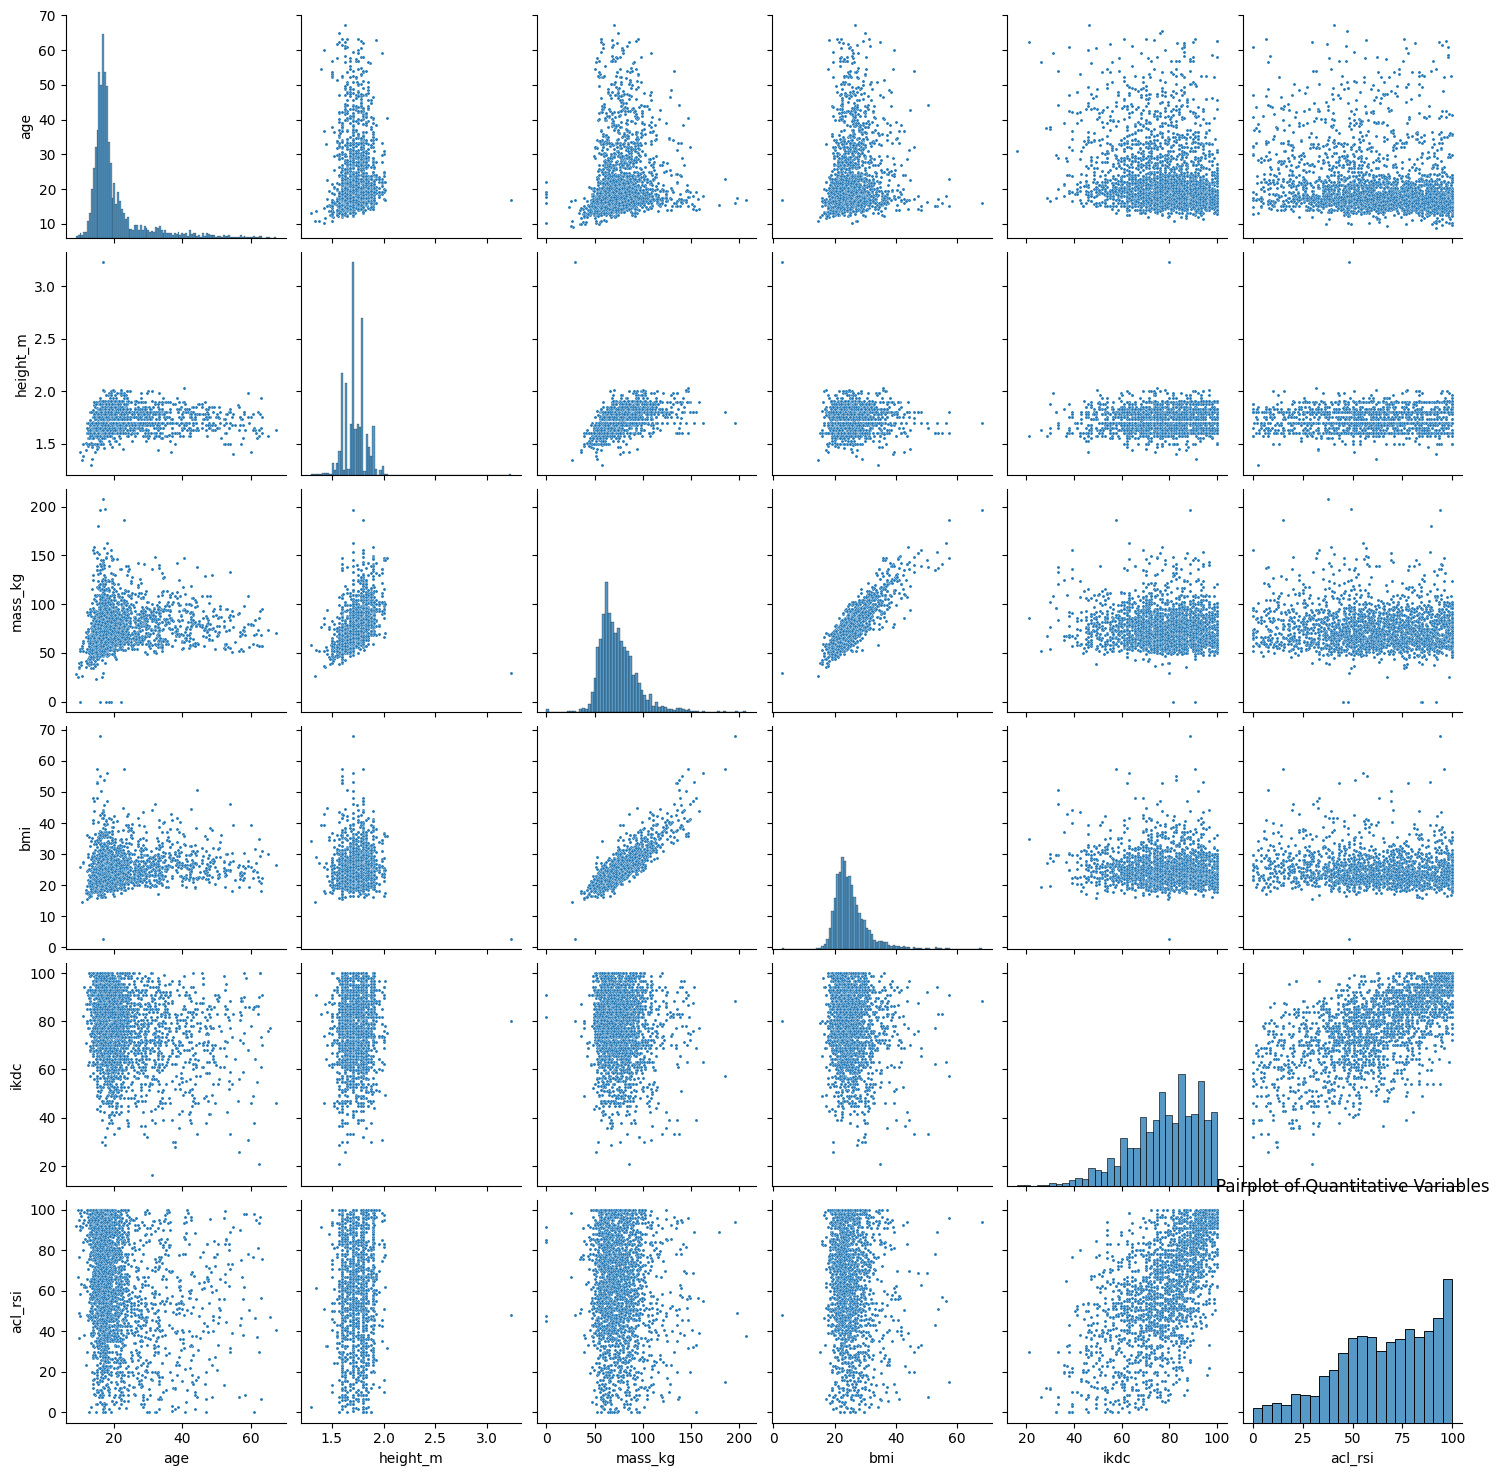

In [5]:
# Pairplot of filtered variables:
sns.pairplot(df[['age', 'height_m', 'mass_kg', 'bmi', 'ikdc', 'acl_rsi']], plot_kws={"s": 5})
plt.title('Pairplot of Quantitative Variables')
plt.show()

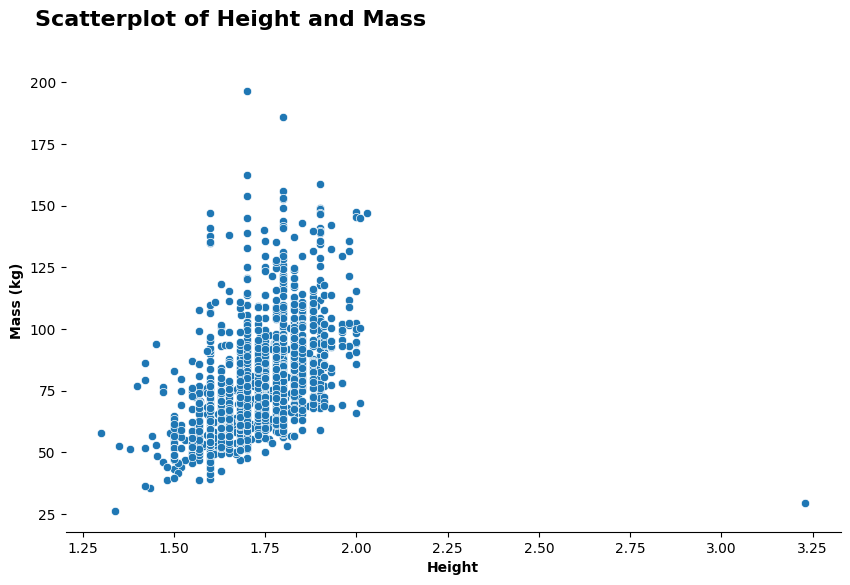

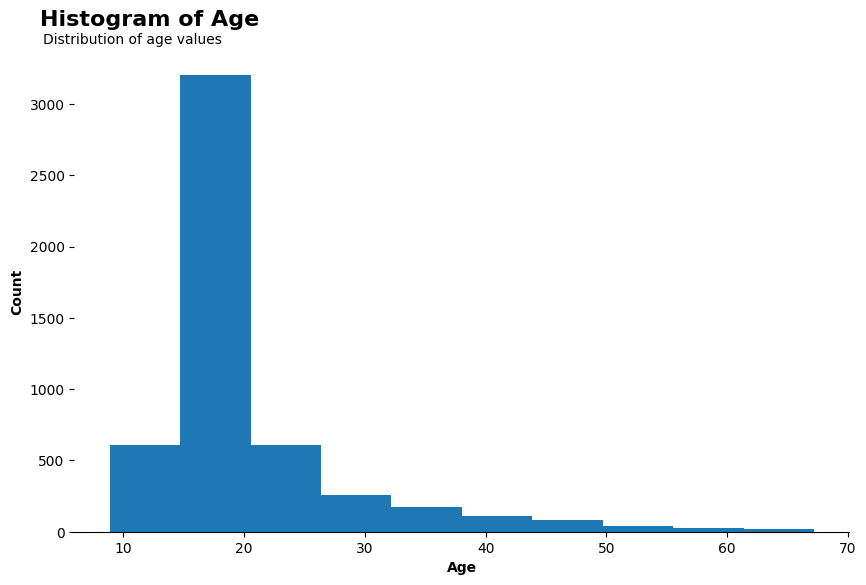

In [6]:
# Creating visualizations to illustrate distributions:


# SCATTERPLOT: Between height and mass_kg
plt.figure(figsize=(10,6))
sns.scatterplot(x='height_m', y='mass_kg', data=df)
# == SCAFFOLDING == 
plt.suptitle('Scatterplot of Height and Mass', weight = 'bold', fontsize = 16, x = 0.29)
# axis labels:
plt.xlabel('Height', weight = 'bold')
plt.ylabel('Mass (kg)', weight = 'bold')

# removing spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


# Histogram for 'age':
plt.figure(figsize=(10,6))
df['age'].plot(kind='hist')
# == SCAFFOLDING == 
plt.suptitle('Histogram of Age', weight = 'bold', fontsize=16, x=0.20)
plt.title('Distribution of age values', fontsize=10, x=0.075)
plt.subplots_adjust(top = 0.91) 

# axis labels:
plt.xlabel('Age', weight = 'bold')
plt.ylabel('Count', weight = 'bold')
# removing spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()


**6.  Examine Correlations (if relevant)**

Interpret findings: What variables appear related?


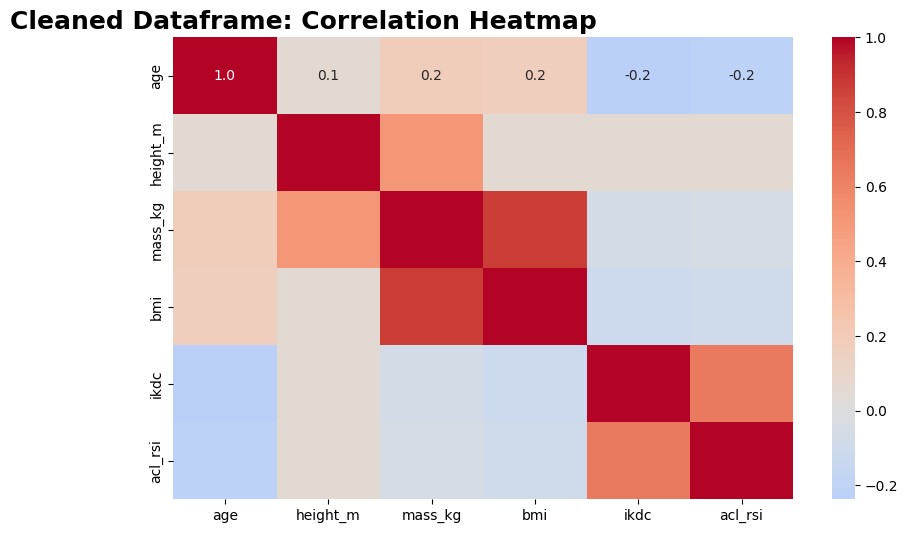

In [11]:
# setting filtered_df to be the relevant columns:
filtered_df = df[['sex_dashboard', 'graft_dashboard2', 'reinjury', 'age', 'height_m', 'mass_kg', 'bmi', 'ikdc', 'acl_rsi']]
# dropping categorical columns:
num_fil_df = filtered_df.drop(['sex_dashboard', 'graft_dashboard2', 'reinjury'], axis=1)
# creating correlation matrix of our filtered numerical columns
corr_matrix = num_fil_df.corr()

# plotting correlation heatmap:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, fmt=".1f", annot=True, cmap="coolwarm", center=0)
plt.title("Cleaned Dataframe: Correlation Heatmap",weight = 'bold', fontsize = 18, x=0.21)
plt.show()

Positively correlated variables seem to include:
- ikdc and acl_rsi
- bmi and mass_kg
- tegner_now and ikdc
- tegner_now and acl_rsi

Negatively correlated variables seem to include:
- tegner_pre and age
- tegner_now and age

**7. Explore Relationships (if relevant)**

Dig into potential causal or descriptive relationships 
Use visualizations and statistical summaries.


   graft_dashboard2 reinjury
0             Other       No
3      HS autograft       No
8      HS autograft    BLANK
10     HS autograft       No
15     HS autograft       No


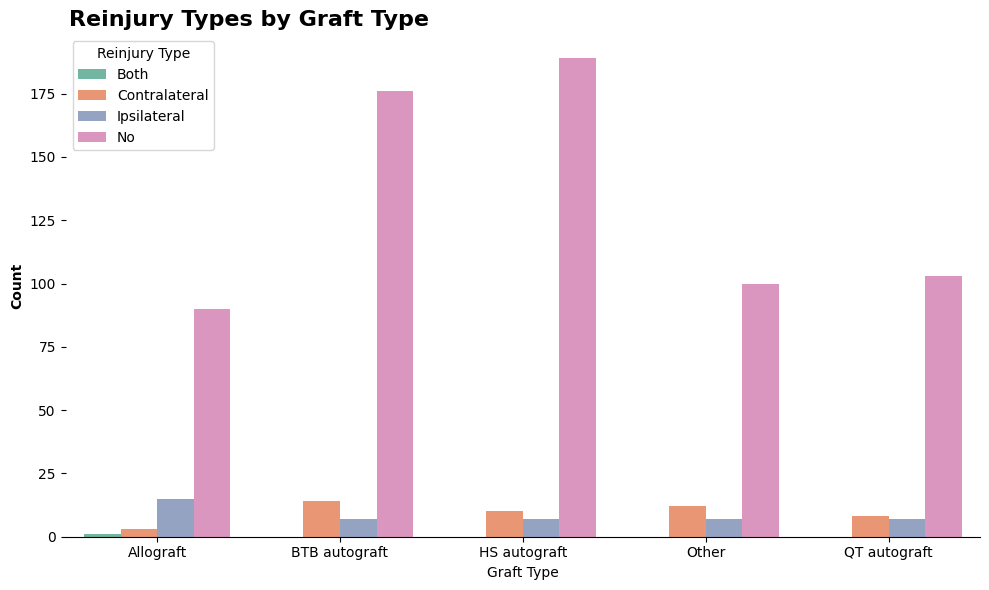

In [8]:
# Records were mismatched so we shifted row values by 1 
# (for every graft_type recorded, reinjury was blank so shifted by 1 to match)
df['reinjury_shifted'] = df['reinjury'].shift(-1)
df_cleaned = df[df['graft_dashboard2'].notna()][['graft_dashboard2', 'reinjury_shifted']]
df_cleaned.columns = ['graft_dashboard2', 'reinjury']
print(df_cleaned.head()) # previewing cleaned dataset

df_cleaned = df_cleaned[
    (df_cleaned['reinjury'].str.upper() != 'BLANK') &
    (df_cleaned['graft_dashboard2'].str.upper() != 'BLANK')]


grouped_counts = (
    df_cleaned.groupby(['graft_dashboard2', 'reinjury'])
    .size()
    .reset_index(name='count')
)

# #graft_order = ['HS allograft', 'BTB allograft', 'QT autograft', 'Allograft', 'Other']
# # Convert 'graft_dashboard2' to a categorical type w order
# #grouped_counts['graft_dashboard2'] = pd.Categorical(
#     grouped_counts['graft_dashboard2'],
#     categories=graft_order,
#     ordered=True
# )
# sort the DataFrame by this order for plotting
#grouped_counts = grouped_counts.sort_values('graft_dashboard2')


# plotting stacked bar chart:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_counts,
    x='graft_dashboard2',
    y='count',
    hue='reinjury',
    palette='Set2'
)
# == SCAFFOLDING == 
plt.xlabel('Graft Type')
plt.ylabel('Count', weight = 'bold')
plt.title('Reinjury Types by Graft Type', weight = 'bold', fontsize = 16, x = 0.2)
plt.legend(title='Reinjury Type')
# removing spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

HS Autograft has the highest proportion of no reinjuries, while the BTB autograft seems to have the highest recorded count of Contralateral reinjuries.

In [9]:
# Bar Chart: Focusing on Tegner as a metric since it assesses overall functionality

# calculating mean and std for both Tegner values:
mean_val = [filtered_df['tegner_pre'].mean(), filtered_df['tegner_now'].mean()]
std_val = [filtered_df['tegner_pre'].std(), filtered_df['tegner_now'].std()]

# == PLOTTING ==
plt.figure(figsize=(10,6))
plt.bar(['Pre', 'Now'], mean_val, yerr=std_val, capsize=5, color=['#7aa095', '#bf8b85'], alpha=0.6)

# SCAFFOLDING:
plt.suptitle('Tegner Performance Decreases after ACL Reconstruction ', weight='bold', fontsize=16, x = 0.46)
plt.title('Comparing Tegner scores before surgery to scores recorded post-surgery', fontsize=12, x = 0.36)

plt.subplots_adjust(top = 0.90) # adjusting space between the super title and the title
plt.ylabel('Tegner Score', weight='bold')
plt.xlabel('Pre vs. Now', weight='bold')

# removing spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()


NameError: name 'filtered_df' is not defined

In [10]:
# Creating a violin plot to compare the tegner_pre and tegner_now by age:

# PLOT
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df[['tegner_pre', 'tegner_now']], inner='quartile')

# SCAFFOLDING:
plt.suptitle('Tegner Scores are Lower After ACL Reconstruction', weight='bold', fontsize=16, x = 0.365)
plt.title('Comparing values from the pre_tegner to the current tegner values', fontsize=12, x = 0.27)

plt.subplots_adjust(top = 0.90) # adjusting space between the super title and the title
plt.ylabel('Tegner Score', weight='bold')
plt.xlabel('Pre vs. Now', weight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

NameError: name 'filtered_df' is not defined

<Figure size 1200x600 with 0 Axes>